<a href="https://colab.research.google.com/github/YKochura/KaggleInClass/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Using Kaggle Datasets in Google Colab


###1.1 Install the kaggle API using command below

In [0]:
!pip3 install -q kaggle

###1.2 Create an API key in Kaggle
To do this, go to `kaggle.com/` and open your user settings page. 
![](https://drive.google.com/uc?id=1DwmtAwHUpWdzlkXFoHclIa7E1j7HO6dg) 



###1.3 Scroll down to the API access section and click **Create New API Token** button to download an API key. 
![](https://drive.google.com/uc?id=10r8ZhhODbMsW34CQM9Cfj4yjZjYMRNAd)

This will download a file called `kaggle.json` to your computer. You'll use this file in Colab to access Kaggle datasets and competitions.



###1.4 Upload your `kaggle.json` file using the following snippet in a code cell:

In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

In [0]:
!ls

kaggle.json  sample_data


###1.5 Move the `kaggle.json` file into `~/.kaggle`, which is where the API client expects your token to be located:

In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle

kaggle.json


###1.5 Set permission to read and write for `kaggle.json`

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c kpid

  0% 0.00/19.6k [00:00<?, ?B/s]
100% 19.6k/19.6k [00:00<00:00, 17.7MB/s]
  0% 0.00/8.21k [00:00<?, ?B/s]
100% 8.21k/8.21k [00:00<00:00, 7.24MB/s]
  0% 0.00/1.34k [00:00<?, ?B/s]
100% 1.34k/1.34k [00:00<00:00, 1.19MB/s]


In [0]:
!ls
!pwd

kaggle.json  sample_data  sample_submission.csv  test.csv  train.csv
/content


--------------------------------------------------------------------------------
#2 Building a Model


###2.1 Importing The Libraries

In [0]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # generate plots, histograms, bar charts, errorcharts,  etc
from keras.models import Sequential # a linear stack of layers
from keras.layers import Dense, Dropout
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras import regularizers
from keras import metrics



###2.2 Loading The Data


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submition = pd.read_csv('sample_submission.csv')
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,89,66,23,94,28.1,0.167,21,0,3
2,0,137,40,35,168,43.1,2.288,33,1,4
3,5,116,74,0,0,25.6,0.201,30,0,5
4,10,115,0,0,0,35.3,0.134,29,0,7


In [0]:
submition.head(10)

,Id,Outcome
0,1,0
1,2,1
2,6,1
3,14,1
4,15,1
5,18,1
6,21,1
7,23,1
8,24,1
9,27,1




###2.3 Visualizing The Important Features


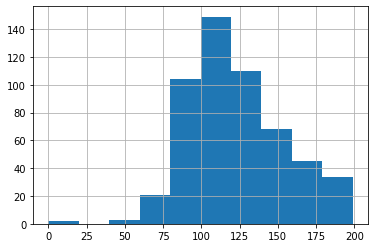

In [0]:
train.Glucose.hist()
plt.show()

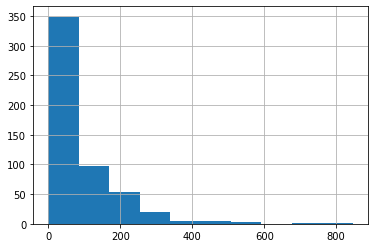

In [0]:
train.Insulin.hist()
plt.show()

###2.4  To avoid high variance/Overfitting on the training data, Scale the features in the range of 0 to 1 using `MinMaxScaler()`

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()

#Scaling The Training Data
x = train.values
x_scaled = min_max_scaler.fit_transform(x)
train = pd.DataFrame(x_scaled)

#Scaling The Testing Data
y = test.values
y_scaled = min_max_scaler.fit_transform(y)
test = pd.DataFrame(y_scaled)
train.head()

,0,1,2,3,4,5,6,7,8,9
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.568627,1.0,0.000000
1,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0,0.003911
2,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.235294,1.0,0.005215
3,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.176471,0.0,0.006519
4,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.156863,0.0,0.009126




###2.5 Visualizing The Important Features After Scaling


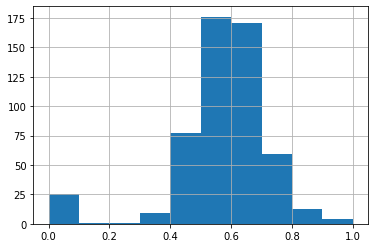

In [0]:
train[2].hist() #Glucose Concentration
plt.show()

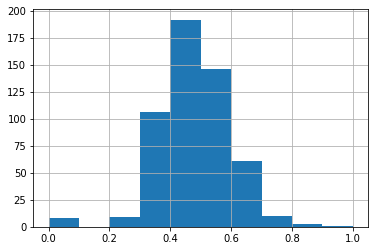

In [0]:
train[5].hist() #Serum Insulin
plt.show()

###2.6 Spliting the training data into Traning and Developement Data


In [0]:
subtrain, dev = train_test_split(train, test_size=0.2)

In [0]:
subtrain.shape

(428, 10)

###2.7 Setting Up the Hyperparameters

In [0]:
hidden_units = 300
learning_rate = 0.005 # optimal learning rate: 0.005
hidden_layer_act = 'tanh' # tanh, relu
output_layer_act = 'sigmoid' # sigmoid, softmax
no_epochs = 120 
bsize = 192 # batch Size Of 192 

hidden_units = 300
learning_rate = 0.005 #Learning rate was quite optimal: 0.005
hidden_layer_act = 'tanh' # tanh, relu
output_layer_act = 'sigmoid' # sigmoid, softmax
no_epochs = 120 #Increasing The epochs would overfit
bsize = 192 #Batch Size Of 128 
Final accuracy: 0.75

###2.8 Model Architechture


In [0]:
model = Sequential()

model.add(Dense(hidden_units, input_dim=8, activation=hidden_layer_act))
#model.add(Dropout(0.2))
model.add(Dense(hidden_units, activation=hidden_layer_act))
#model.add(Dropout(0.2))
model.add(Dense(1, activation=output_layer_act))

###2.9 Setting Up loss function, Optimizer, Metrics

In [0]:
adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
#adadelta = optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(loss='binary_crossentropy', optimizer = adam, metrics=['accuracy'])

###2.10 Training the Model

In [0]:
train_x = subtrain.iloc[:, 0:8]
train_y = subtrain.iloc[:,8]

model.fit(train_x, train_y, epochs=no_epochs, batch_size= bsize,  verbose=2)

Epoch 1/120
 - 1s - loss: 0.7797 - acc: 0.5234
Epoch 2/120
 - 0s - loss: 0.6608 - acc: 0.6752
Epoch 3/120
 - 0s - loss: 0.6436 - acc: 0.6215
Epoch 4/120
 - 0s - loss: 0.6085 - acc: 0.6752
Epoch 5/120
 - 0s - loss: 0.6483 - acc: 0.6729
Epoch 6/120
 - 0s - loss: 0.5895 - acc: 0.6916
Epoch 7/120
 - 0s - loss: 0.5930 - acc: 0.6589
Epoch 8/120
 - 0s - loss: 0.5645 - acc: 0.7336
Epoch 9/120
 - 0s - loss: 0.5579 - acc: 0.7383
Epoch 10/120
 - 0s - loss: 0.5491 - acc: 0.7243
Epoch 11/120
 - 0s - loss: 0.5329 - acc: 0.7336
Epoch 12/120
 - 0s - loss: 0.5209 - acc: 0.7570
Epoch 13/120
 - 0s - loss: 0.5051 - acc: 0.7687
Epoch 14/120
 - 0s - loss: 0.4927 - acc: 0.7827
Epoch 15/120
 - 0s - loss: 0.4996 - acc: 0.7664
Epoch 16/120
 - 0s - loss: 0.4982 - acc: 0.7710
Epoch 17/120
 - 0s - loss: 0.5224 - acc: 0.7547
Epoch 18/120
 - 0s - loss: 0.4749 - acc: 0.7897
Epoch 19/120
 - 0s - loss: 0.4842 - acc: 0.7850
Epoch 20/120
 - 0s - loss: 0.4999 - acc: 0.7710
Epoch 21/120
 - 0s - loss: 0.4997 - acc: 0.7500
E

###2.11 Validation Loss and Accuracy

In [0]:
val_loss, val_acc = model.evaluate(dev.iloc[:,0:8], dev.iloc[:,8])
print("Validation Loss : ", val_loss)
print("Validation Acc : ",val_acc)

108/108 [==============================] - 0s 3ms/step
Validation Loss :  0.4512185608899152
Validation Acc :  0.7962962940887168


###2.12 Predicting the Outputs for the Training Data

In [0]:
test_x=test.iloc[:,0:8]
predictions = model.predict(test_x)
print(predictions)

[[0.06341761]
 [0.91391706]
 [0.09391961]
 [0.7648232 ]
 [0.6316904 ]
 [0.44074833]
 [0.6042946 ]
 [0.36669213]
 [0.82068646]
 [0.0877279 ]
 [0.5634896 ]
 [0.7031368 ]
 [0.21374995]
 [0.6343019 ]
 [0.16915664]
 [0.9720683 ]
 [0.8259669 ]
 [0.06219628]
 [0.5177481 ]
 [0.10349363]
 [0.7986071 ]
 [0.4080111 ]
 [0.25836802]
 [0.01439157]
 [0.16774851]
 [0.26440758]
 [0.05406433]
 [0.00601873]
 [0.22257549]
 [0.87825626]
 [0.14689004]
 [0.05772147]
 [0.35837817]
 [0.15539667]
 [0.72453773]
 [0.852476  ]
 [0.07570475]
 [0.6366658 ]
 [0.37739024]
 [0.18143311]
 [0.34601563]
 [0.2341761 ]
 [0.32651472]
 [0.29651386]
 [0.8130035 ]
 [0.88390225]
 [0.7763258 ]
 [0.39675394]
 [0.10777232]
 [0.33606398]
 [0.45450795]
 [0.6410248 ]
 [0.8224801 ]
 [0.70341194]
 [0.92746663]
 [0.2070607 ]
 [0.5837654 ]
 [0.35237092]
 [0.7245929 ]
 [0.25919455]
 [0.08182219]
 [0.4631581 ]
 [0.00692135]
 [0.12152675]
 [0.8912103 ]
 [0.45719197]
 [0.4863599 ]
 [0.99012667]
 [0.79997116]
 [0.73882216]
 [0.2080076 ]
 [0.16

###2.13 Generate a Submission File


In [0]:
fileName = 'submitionE' + str(no_epochs) + 'B' + str(bsize) + hidden_layer_act +'.csv'
rounded = [int(round(x[0])) for x in predictions]
print(rounded)
submition.Outcome = rounded
submition.to_csv(fileName,index = False)

[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]


In [0]:
!ls

kaggle.json		   submitionE120B192.csv      submitionE140B192.csv
sample_data		   submitionE120B192tanh.csv  test.csv
sample_submission.csv	   submitionE125B192relu.csv  train.csv
submition4.csv		   submitionE125B192tanh.csv
submitionE110B192tanh.csv  submitionE130B192relu.csv


###2.14 Downloading the Submission File to your Local File System

In [0]:
files.download(fileName)